#### Efficiency of a Thermionic Generator with Radiation Losses

Stefan-Boltzmann law:

$$P_r = \sigma \epsilon T_\text{E}^4 $$

Under equilibrium conditions, from Kirchoff's thermodynamic law, the emissivity of a surface must equal its absorptivity:

$$\epsilon = \alpha $$

When a hot emitter radiates energy to a collector, a fraction of the energy is absorbed by the collector ($\alpha_\text{C} = \epsilon_\text{C}$) and a fraction is returned to the emitter ($1 - \epsilon_\text{C}$). Radiation is then absorbed and part is returned to the collector. This radiation continues altering the apparent emissivity of the emitter. The effective emissivity takes into account the environment and material properties, $\epsilon_\text{eff}$:

$$\epsilon_\text{eff,E} = \frac{1}{1/\epsilon_\text{E} + 1/\epsilon_\text{C} - 1} $$

The effective emissivity of the collector is:

$$\epsilon_\text{eff,C} = \frac{1}{1/\epsilon_\text{C} + 1/\epsilon_\text{E} - 1} $$

Two plates close to each other have the same effective emissivity. 

In [2]:
epsilon_E = 0.33
epsilon_C = 0.2

TE_K = 2500
TC_K = 1800

sigma_WperM2perK4 = 5.67e-8

epsilonEff = 1/((1/epsilon_E)+(1/epsilon_C)-1); print(epsilonEff)

Pr_WperM2 = sigma_WperM2perK4*epsilonEff*(TE_K**4 - TC_K**4); print(Pr_WperM2)

0.1422413793103448
230378.38099137926


Recall our earlier equation for efficiency:

The efficiency is then:

$$\eta = \frac{P_\text{out}}{P_\text{in}} = \frac{\left(\phi_\text{E} - \phi_\text{C} \right)}{\phi_\text{E}} $$

From this we see that maximizing $\phi_\text{E}$ is a good strategy. However, radiation losses changes this and there is only one value of $\phi_\text{E}$ that maximizes efficiency. 

We want a material that is capable of producing large currents even at low temperatures. That is, we want a material with lower $\phi_\text{E}$. While this reduces radiation losses, it also reduces power output which is proportional to $\phi_\text{E} - \phi_\text{C}$. The output power density is:

$$P_\text{L} = J_0 \left(\phi_\text{E} - \phi_\text{C} \right) $$

while the input heat power is the sum of the energy required to evaporate electrons plus the radiation losses:

$$P_\text{in} = J_0\phi_\text{E} + \sigma \epsilon_\text{eff} T_\text{E}^4 $$

neglecting the collector temperature. The efficiency is then:

$$\eta = \frac{J_0 \left(\phi_\text{E} - \phi_\text{C} \right) }{J_0\phi_\text{E} + \sigma \epsilon_\text{eff} T_\text{E}^4 } $$

Recalling our formula for current density for an emitter:

$$J_0 = A T_\text{E}^2 \exp \left[-\frac{q \phi_\text{E}}{k_B T_\text{E}} \right] $$

Substituting into the above:

$$\eta = \frac{\left(\phi_\text{E} - \phi_\text{C} \right) }{\phi_\text{E} + \sigma \epsilon_\text{eff} T_\text{E}^4 /(A_\text{E} T_\text{E}^2 \exp \left[-\frac{q \phi_\text{E}}{k_B T_\text{E}} \right] )  } $$

$$\eta = \frac{\left(\phi_\text{E} - \phi_\text{C} \right) }{\phi_\text{E} + (\sigma/A_\text{E}) \epsilon_\text{eff} T_\text{E}^2 \exp \left[\frac{q \phi_\text{E}}{k_B T_\text{E}} \right]   } $$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

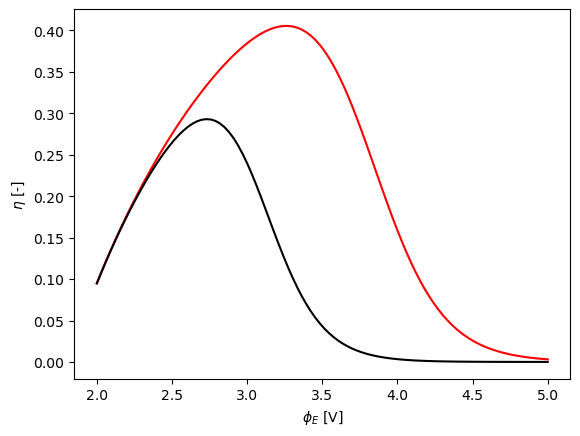

In [13]:
# substituting values

q_C = 1.602e-19
kB_JperK = 1.380e-23

phiC_V = 1.81
TE1_K = 2500
TE2_K = 2000

AE_AperM2perK2 = 600000

phiE_V = np.linspace(2, 5, 100) # range of temperatures

eta1 = [(phi - phiC_V)/(phi + (sigma_WperM2perK4/AE_AperM2perK2)*epsilonEff*(TE1_K**2)*np.exp(phi*q_C/(kB_JperK*TE1_K))) for phi in phiE_V]
eta2 = [(phi - phiC_V)/(phi + (sigma_WperM2perK4/AE_AperM2perK2)*epsilonEff*(TE2_K**2)*np.exp(phi*q_C/(kB_JperK*TE2_K))) for phi in phiE_V]

plt.plot(phiE_V, eta1, 'r-')
plt.plot(phiE_V, eta2, 'k-')

plt.xlabel('$\phi_E$ [V]')
plt.ylabel('$\eta$ [-]')

plt.savefig('thermionic-eta-phiE-diagram.png')